In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("housing.csv")

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
# dropping the nan values
df.dropna(inplace=True)

In [8]:
def scatter(data, x, y, ax=None):
    
    if ax is None:
        ax = plt.gca();
        
    ax.scatter(data[x], data[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    return ax

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

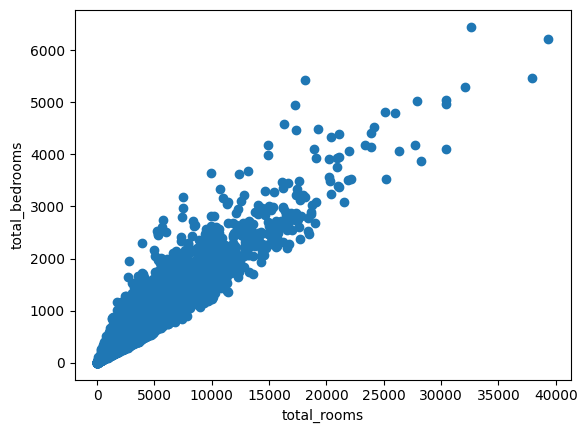

In [19]:
scatter(df,"total_rooms","total_bedrooms")

### Splitting the data

In [35]:
train, test = train_test_split(df, test_size=0.3)

In [22]:
df.shape

(20640, 10)

In [23]:
train.shape

(14448, 10)

In [24]:
test.shape

(6192, 10)

**Simple Linear Regression**\
General Linear Equation for single feature
$${y = mx + c}$$
or
$${\text{label} = \text{coff}.\text{feature}  + \text{intercept}}$$

Linear equation for multiple feature.
$${f(x) = \beta_0x_1 +\beta_1x_2 + \beta_2x_3 + ... + \beta_nx_n+ c }$$

In [36]:
model = LinearRegression()

In [37]:
x_train = train['total_rooms']
y_train = train['total_bedrooms']

x_test = test['total_rooms']
y_test = test['total_bedrooms']

In [30]:
def series_reshape(shape, *serieses):
    reshaped = []
    for series in serieses:
        reshaped.append(series.to_numpy().reshape(*shape))
        
    return reshaped

In [38]:
 x_train,y_train,x_test,y_test= series_reshape((-1,1), x_train,y_train,x_test,y_test)x

In [39]:
x_train.shape

(14303, 1)

**Training the model**

In [40]:
# training the model with train data using fit method.
model.fit(x_train, y_train)

LinearRegression()

In [47]:
print("model coff_: ", model.coef_[0,0])
print("model intercept : ", model.intercept_[0])

model coff_:  0.1804197736231574
model intercept :  63.269730906363236


In [53]:
def lm_scatter(data, x, y, ax=None):
    
    if ax is None:
        ax = plt.gca();
        
    model = LinearRegression()
    
    # first remove all the nan values
    _data_ = data[[x,y]].dropna()
    
    train_x, test_x, train_y, test_y = train_test_split(_data_[x], _data_[y], test_size=0.3)
    
    train_x, test_x, train_y, test_y = series_reshape((-1,1), train_x, test_x, train_y, test_y)
    
    model.fit(train_x, train_y)
    
    coff = model.coef_[0,0]
    intercept = model.intercept_[0]
    
    #label=coff.feature+intercept
    y_pred = coff*test_x + intercept        
    ax.scatter(data[x], data[y])
    
    ax.plot(test_x, y_pred, color='red')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    return ax

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

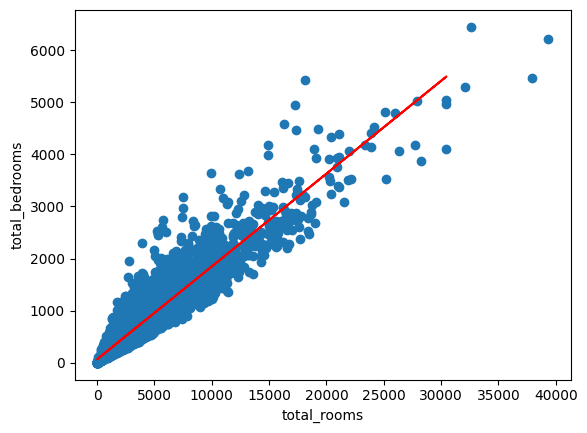

In [51]:
lm_scatter(df, 'total_rooms',"total_bedrooms")

In [54]:
def lm_scatter2(data, x, y, ax=None):
    
    if ax is None:
        ax = plt.gca();
        
    model = LinearRegression()
    
    # first remove all the nan values
    _data_ = data[[x,y]].dropna()
    
    train_x, test_x, train_y, test_y = train_test_split(_data_[x], _data_[y], test_size=0.3)
    
    train_x, test_x, train_y, test_y = series_reshape((-1,1), train_x, test_x, train_y, test_y)
    
    model.fit(train_x, train_y)
    
    
    ax.scatter(data[x], data[y])
    
    ax.plot(test_x, model.predict(test_x), color='red')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    return ax

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

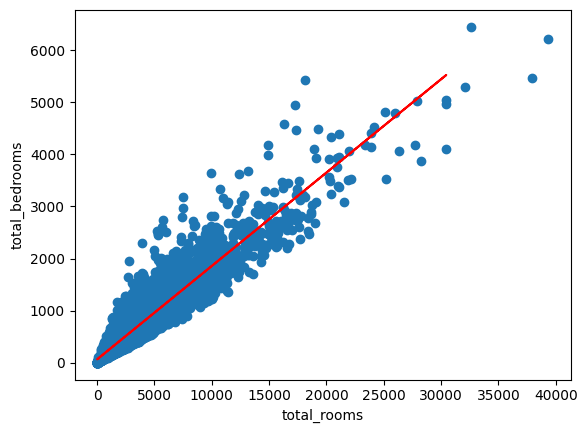

In [55]:
lm_scatter2(df,"total_rooms","total_bedrooms")

(array([5623.]), array([780.]))

In [63]:
item =2
y_pred= model.predict(x_test[item].reshape(-1,1))

print("original x_value: ", x_test[item])
print("original y_value: ", y_test[item])
print("pridicted y_value: ", y_pred[0])
print()

original x_value:  [1402.]
original y_value:  [254.]
pridicted y_value:  [316.21825353]

